In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
train_data = pd.read_csv(r'D:\python\1_Internship\naimi_new4_preprocessed.csv')
train_data.describe()

,id,ltd,ltm,total_replenishment_lt,total_replenishment_pd,cash_expenditure_pd,services_count_pd,amount,duration,npl_days,...,connect_period_proportion_pd,catalog_responses_proportion_pd,target,Cluster,year,month,day,year_opened,month_opened,day_opened
count,2.205600e+04,22056.000000,22056.000000,2.205600e+04,2.205600e+04,2.205600e+04,22056.000000,22056.000000,22056.000000,22056.000000,...,22056.000000,22056.000000,22056.000000,22056.000000,22056.000000,22056.000000,22056.000000,22056.000000,22056.000000,22056.000000
mean,2.525310e+05,720.008433,24.486852,1.256050e+05,5.781612e+04,5.766848e+04,7.563339,2353.504942,14.915216,42.409956,...,39.140773,0.187209,0.239345,1.824311,2021.855459,6.465361,15.716676,2019.901659,6.240796,16.103464
std,2.046874e+05,492.111629,16.408482,2.322413e+05,1.812970e+05,1.816298e+05,6.622562,3277.107326,8.550307,95.546776,...,28.328118,0.229265,0.426694,1.150679,0.781943,3.807506,8.779612,1.336743,3.513824,8.696416
min,7.940000e+02,3.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,50.000000,10.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2021.000000,1.000000,1.000000,2016.000000,1.000000,1.000000
25%,9.338900e+04,337.000000,12.000000,1.109875e+04,2.500000e+03,2.350000e+03,3.000000,750.000000,10.000000,0.000000,...,15.555556,0.023810,0.000000,1.000000,2021.000000,3.000000,8.000000,2019.000000,3.000000,9.000000
50%,1.786200e+05,649.000000,22.000000,3.400000e+04,8.000000e+03,7.560000e+03,5.000000,1250.000000,10.000000,8.000000,...,34.444444,0.090610,0.000000,2.000000,2022.000000,7.000000,16.000000,2020.000000,6.000000,16.000000
75%,3.536280e+05,984.250000,33.000000,1.206112e+05,2.450000e+04,2.394775e+04,11.000000,2730.000000,15.000000,29.000000,...,58.888889,0.267613,0.000000,2.000000,2022.000000,10.000000,23.000000,2021.000000,9.000000,23.000000
max,1.014521e+06,2741.000000,92.000000,1.626484e+06,1.290836e+06,1.293878e+06,50.000000,69750.000000,90.000000,831.000000,...,100.000000,1.000000,1.000000,4.000000,2023.000000,12.000000,31.000000,2023.000000,12.000000,31.000000


In [44]:
new_data = pd.read_csv(r'D:\python\1_Internship\history_2024-07-04.csv')
new_data.describe()

,app_id,amount,duration,is_approved,is_success,nlp,spec_id,phone_number,ltd,age_pd,...,daily_amount_requests_connects_cpd,daily_amount_reviews_pd,daily_amount_hires_pd,avg_amount_reviews_lt,avg_check_categories_pd,frequency_segment_lt,calls_per_day_pd,recency_segment_lt,threshold,prediction
count,31837.000000,31837.000000,31837.000000,766.0,229.0,31837.000000,3.183700e+04,3.183700e+04,31837.000000,31837.000000,...,31837.000000,31837.00000,31837.000000,31837.000000,31837.000000,31837.000000,31837.000000,31837.000000,31837.0,31716.000000
mean,16316.971385,54695.672394,85.787292,1.0,1.0,0.136602,3.954779e+05,7.734238e+10,1238.450325,35.321073,...,1956.285887,251.57351,306.072835,365.414897,27429.434820,2.252065,0.215512,3.187298,15.0,68.364359
std,9241.595578,19839.621662,15.376287,0.0,0.0,3.589358,3.122704e+05,3.232190e+08,604.013427,8.608636,...,1528.310345,792.61667,983.602237,737.467070,20850.936414,0.978539,0.568897,1.502711,0.0,18.474064
min,28.000000,2205.000000,10.000000,1.0,1.0,0.000000,1.080000e+02,7.000000e+10,1.000000,18.000000,...,0.000000,0.00000,0.000000,0.000000,4000.000000,0.000000,0.000000,0.000000,15.0,0.000000
25%,8381.000000,50000.000000,90.000000,1.0,1.0,0.000000,1.279770e+05,7.705845e+10,902.000000,29.000000,...,836.055116,0.00000,0.000000,24.491682,13375.000000,2.000000,0.000000,2.000000,15.0,62.000000
50%,16347.000000,70000.000000,90.000000,1.0,1.0,0.000000,3.038720e+05,7.708664e+10,1186.000000,34.000000,...,1397.814082,0.00000,0.000000,95.819954,20000.000000,2.000000,0.000000,3.000000,15.0,74.000000
75%,24310.000000,70000.000000,90.000000,1.0,1.0,0.000000,6.242360e+05,7.775152e+10,1625.000000,40.000000,...,2791.858053,0.00000,111.111111,375.000000,36660.000000,2.000000,0.144444,5.000000,15.0,81.000000
max,32283.000000,70000.000000,90.000000,1.0,1.0,139.000000,1.109566e+06,7.779000e+10,3396.000000,78.000000,...,7342.186866,30000.00000,29533.333333,30000.000000,200000.000000,5.000000,11.411111,5.000000,15.0,97.000000


In [45]:
print("Train data:")
print(train_data.shape)
print("New data:")
print(new_data.shape)

Train data:
(22056, 64)
New data:
(31837, 36)


In [46]:
train_data = train_data.drop_duplicates()
print(train_data.shape)
train_data.describe()

(22056, 64)


,id,ltd,ltm,total_replenishment_lt,total_replenishment_pd,cash_expenditure_pd,services_count_pd,amount,duration,npl_days,...,connect_period_proportion_pd,catalog_responses_proportion_pd,target,Cluster,year,month,day,year_opened,month_opened,day_opened
count,2.205600e+04,22056.000000,22056.000000,2.205600e+04,2.205600e+04,2.205600e+04,22056.000000,22056.000000,22056.000000,22056.000000,...,22056.000000,22056.000000,22056.000000,22056.000000,22056.000000,22056.000000,22056.000000,22056.000000,22056.000000,22056.000000
mean,2.525310e+05,720.008433,24.486852,1.256050e+05,5.781612e+04,5.766848e+04,7.563339,2353.504942,14.915216,42.409956,...,39.140773,0.187209,0.239345,1.824311,2021.855459,6.465361,15.716676,2019.901659,6.240796,16.103464
std,2.046874e+05,492.111629,16.408482,2.322413e+05,1.812970e+05,1.816298e+05,6.622562,3277.107326,8.550307,95.546776,...,28.328118,0.229265,0.426694,1.150679,0.781943,3.807506,8.779612,1.336743,3.513824,8.696416
min,7.940000e+02,3.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,50.000000,10.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2021.000000,1.000000,1.000000,2016.000000,1.000000,1.000000
25%,9.338900e+04,337.000000,12.000000,1.109875e+04,2.500000e+03,2.350000e+03,3.000000,750.000000,10.000000,0.000000,...,15.555556,0.023810,0.000000,1.000000,2021.000000,3.000000,8.000000,2019.000000,3.000000,9.000000
50%,1.786200e+05,649.000000,22.000000,3.400000e+04,8.000000e+03,7.560000e+03,5.000000,1250.000000,10.000000,8.000000,...,34.444444,0.090610,0.000000,2.000000,2022.000000,7.000000,16.000000,2020.000000,6.000000,16.000000
75%,3.536280e+05,984.250000,33.000000,1.206112e+05,2.450000e+04,2.394775e+04,11.000000,2730.000000,15.000000,29.000000,...,58.888889,0.267613,0.000000,2.000000,2022.000000,10.000000,23.000000,2021.000000,9.000000,23.000000
max,1.014521e+06,2741.000000,92.000000,1.626484e+06,1.290836e+06,1.293878e+06,50.000000,69750.000000,90.000000,831.000000,...,100.000000,1.000000,1.000000,4.000000,2023.000000,12.000000,31.000000,2023.000000,12.000000,31.000000


In [47]:
new_data = new_data.drop_duplicates()
print(new_data.shape)
new_data.describe()

(31837, 36)


,app_id,amount,duration,is_approved,is_success,nlp,spec_id,phone_number,ltd,age_pd,...,daily_amount_requests_connects_cpd,daily_amount_reviews_pd,daily_amount_hires_pd,avg_amount_reviews_lt,avg_check_categories_pd,frequency_segment_lt,calls_per_day_pd,recency_segment_lt,threshold,prediction
count,31837.000000,31837.000000,31837.000000,766.0,229.0,31837.000000,3.183700e+04,3.183700e+04,31837.000000,31837.000000,...,31837.000000,31837.00000,31837.000000,31837.000000,31837.000000,31837.000000,31837.000000,31837.000000,31837.0,31716.000000
mean,16316.971385,54695.672394,85.787292,1.0,1.0,0.136602,3.954779e+05,7.734238e+10,1238.450325,35.321073,...,1956.285887,251.57351,306.072835,365.414897,27429.434820,2.252065,0.215512,3.187298,15.0,68.364359
std,9241.595578,19839.621662,15.376287,0.0,0.0,3.589358,3.122704e+05,3.232190e+08,604.013427,8.608636,...,1528.310345,792.61667,983.602237,737.467070,20850.936414,0.978539,0.568897,1.502711,0.0,18.474064
min,28.000000,2205.000000,10.000000,1.0,1.0,0.000000,1.080000e+02,7.000000e+10,1.000000,18.000000,...,0.000000,0.00000,0.000000,0.000000,4000.000000,0.000000,0.000000,0.000000,15.0,0.000000
25%,8381.000000,50000.000000,90.000000,1.0,1.0,0.000000,1.279770e+05,7.705845e+10,902.000000,29.000000,...,836.055116,0.00000,0.000000,24.491682,13375.000000,2.000000,0.000000,2.000000,15.0,62.000000
50%,16347.000000,70000.000000,90.000000,1.0,1.0,0.000000,3.038720e+05,7.708664e+10,1186.000000,34.000000,...,1397.814082,0.00000,0.000000,95.819954,20000.000000,2.000000,0.000000,3.000000,15.0,74.000000
75%,24310.000000,70000.000000,90.000000,1.0,1.0,0.000000,6.242360e+05,7.775152e+10,1625.000000,40.000000,...,2791.858053,0.00000,111.111111,375.000000,36660.000000,2.000000,0.144444,5.000000,15.0,81.000000
max,32283.000000,70000.000000,90.000000,1.0,1.0,139.000000,1.109566e+06,7.779000e+10,3396.000000,78.000000,...,7342.186866,30000.00000,29533.333333,30000.000000,200000.000000,5.000000,11.411111,5.000000,15.0,97.000000


In [48]:
new_data['date'] = pd.to_datetime(new_data['date'])

requests_count = new_data.groupby(['spec_id', 'date']).size().reset_index(name='requests_count')
requests_count = requests_count[requests_count['requests_count'] > 1]

num_rows = len(requests_count)
if num_rows == 0:
    print("Нет записей с количеством заявок больше одной.")
else:
    print(f"Количество записей с количеством заявок больше одной: {num_rows}")

    pd.set_option('display.max_rows', 10)
    print("\nПример первых 10 записей:")
requests_count.head(10)

Количество записей с количеством заявок больше одной: 2016

Пример первых 10 записей:


,spec_id,date,requests_count
26,2257,2024-03-01 12:37:32+00:00,2
27,2257,2024-05-03 19:40:42+00:00,2
28,2257,2024-05-19 12:04:12+00:00,2
29,2257,2024-06-18 12:27:57+00:00,2
50,4044,2024-05-08 19:20:41+00:00,2
63,4793,2024-04-05 13:42:34+00:00,2
95,5522,2024-01-31 13:31:58+00:00,2
96,5522,2024-02-02 18:40:00+00:00,2
97,5522,2024-02-06 12:43:39+00:00,2
98,5522,2024-04-06 06:33:36+00:00,2


In [49]:
requests_count = new_data.groupby(['spec_id', 'date']).size().reset_index(name='requests_count')
requests_count = pd.merge(requests_count, new_data[['spec_id', 'date', 'prediction']], on=['spec_id', 'date'], how='left')

requests_count = requests_count[requests_count['requests_count'] > 1]

if len(requests_count) == 0:
    print("Нет записей с количеством заявок больше одной.")
else:
    pd.set_option('display.max_rows', None)

    all_filtered_data = []
    for spec_id in requests_count['spec_id'].unique():
        spec_id_data = requests_count[requests_count['spec_id'] == spec_id]

        if len(spec_id_data) > 1:
            spec_id_data = spec_id_data.dropna(subset=['prediction'])

            if not spec_id_data.empty:
                min_prediction_index = spec_id_data['prediction'].idxmin()

                filtered_data = spec_id_data.loc[min_prediction_index:min_prediction_index]
                all_filtered_data.append(filtered_data)
        else:
            all_filtered_data.append(spec_id_data.iloc[0])

    all_filtered_data = pd.concat(all_filtered_data)
    num_rows = len(all_filtered_data)

    print(f"Общее количество записей с предикцией поменьше: {num_rows}")

    print("\nПример первых 10 записей:")
all_filtered_data.head(10)

Общее количество записей с предикцией поменьше: 1157

Пример первых 10 записей:


,spec_id,date,requests_count,prediction
27,2257,2024-03-01 12:37:32+00:00,2,2.0
55,4044,2024-05-08 19:20:41+00:00,2,10.0
69,4793,2024-04-05 13:42:34+00:00,2,29.0
102,5522,2024-01-31 13:31:58+00:00,2,16.0
120,5859,2024-02-07 19:27:56+00:00,2,24.0
210,8109,2024-01-28 00:46:59+00:00,2,40.0
217,8340,2024-01-17 10:22:30+00:00,3,23.0
223,8376,2024-02-13 07:58:35+00:00,2,33.0
358,11360,2024-01-24 10:46:22+00:00,3,31.0
376,11492,2024-03-07 10:41:16+00:00,2,29.0


In [50]:
max_date = new_data['date'].max()

print("Максимальная дата:", max_date)

Максимальная дата: 2024-06-28 18:59:31+00:00


In [51]:
filter_date = pd.Timestamp('2024-04-28 00:00:00+00:00')
filtered_data = new_data[new_data['date'] <= filter_date]

num_rows = len(filtered_data)

print(f"Количество данных до 2024-04-28: {num_rows}")

print("\nПример первых 10 строк:")
filtered_data.head(10)

Количество данных до 2024-04-28: 4148

Пример первых 10 строк:


,app_id,amount,duration,is_approved,is_success,state,nlp,spec_id,phone_number,date,...,daily_amount_requests_connects_cpd,daily_amount_reviews_pd,daily_amount_hires_pd,avg_amount_reviews_lt,avg_check_categories_pd,frequency_segment_lt,calls_per_day_pd,recency_segment_lt,threshold,prediction
27689,4470,16450,90,NaN,NaN,Отказ,0,289733,77055145278,2024-04-27 23:40:35+00:00,...,909.430003,780.555556,1020.0,456.323414,16250.000000,3,0.433333,5,15,71.0
27690,4469,14000,90,NaN,NaN,Отказ,0,289733,77055145278,2024-04-27 23:40:35+00:00,...,909.430003,780.555556,1020.0,456.323414,16250.000000,3,0.433333,5,15,71.0
27691,4468,14000,30,NaN,NaN,Отказ,0,289733,77055145278,2024-04-27 23:40:35+00:00,...,909.430003,780.555556,1020.0,456.323414,16250.000000,3,0.433333,5,15,24.0
27692,4467,5670,90,NaN,NaN,Отказ,0,992046,77476779824,2024-04-27 15:57:42+00:00,...,4783.633521,0.000000,0.0,0.000000,51996.428571,2,0.255556,5,15,73.0
27693,4466,5670,30,NaN,NaN,Отказ,0,992046,77476779824,2024-04-27 15:57:42+00:00,...,4783.633521,0.000000,0.0,0.000000,51996.428571,2,0.255556,5,15,27.0
27694,4465,7403,90,NaN,NaN,Отказ,0,25252,77764546454,2024-04-27 15:43:31+00:00,...,938.093247,0.000000,0.0,51.874755,10000.000000,2,0.000000,3,15,77.0
27695,4464,6300,90,NaN,NaN,Отказ,0,25252,77764546454,2024-04-27 15:43:31+00:00,...,938.093247,0.000000,0.0,51.874755,10000.000000,2,0.000000,3,15,76.0
27696,4463,6300,30,NaN,NaN,Отказ,0,25252,77764546454,2024-04-27 15:43:31+00:00,...,938.093247,0.000000,0.0,51.874755,10000.000000,2,0.000000,3,15,31.0
27697,4462,14276,90,NaN,NaN,Отказ,0,427997,77021222000,2024-04-27 10:57:14+00:00,...,482.586409,0.000000,0.0,25.998185,14416.666667,2,0.000000,2,15,77.0
27698,4461,12150,90,NaN,NaN,Отказ,0,427997,77021222000,2024-04-27 10:57:14+00:00,...,482.586409,0.000000,0.0,25.998185,14416.666667,2,0.000000,2,15,77.0


In [52]:
new_data = new_data.drop_duplicates()
print(new_data.shape)
new_data.describe()

(31837, 36)


,app_id,amount,duration,is_approved,is_success,nlp,spec_id,phone_number,ltd,age_pd,...,daily_amount_requests_connects_cpd,daily_amount_reviews_pd,daily_amount_hires_pd,avg_amount_reviews_lt,avg_check_categories_pd,frequency_segment_lt,calls_per_day_pd,recency_segment_lt,threshold,prediction
count,31837.000000,31837.000000,31837.000000,766.0,229.0,31837.000000,3.183700e+04,3.183700e+04,31837.000000,31837.000000,...,31837.000000,31837.00000,31837.000000,31837.000000,31837.000000,31837.000000,31837.000000,31837.000000,31837.0,31716.000000
mean,16316.971385,54695.672394,85.787292,1.0,1.0,0.136602,3.954779e+05,7.734238e+10,1238.450325,35.321073,...,1956.285887,251.57351,306.072835,365.414897,27429.434820,2.252065,0.215512,3.187298,15.0,68.364359
std,9241.595578,19839.621662,15.376287,0.0,0.0,3.589358,3.122704e+05,3.232190e+08,604.013427,8.608636,...,1528.310345,792.61667,983.602237,737.467070,20850.936414,0.978539,0.568897,1.502711,0.0,18.474064
min,28.000000,2205.000000,10.000000,1.0,1.0,0.000000,1.080000e+02,7.000000e+10,1.000000,18.000000,...,0.000000,0.00000,0.000000,0.000000,4000.000000,0.000000,0.000000,0.000000,15.0,0.000000
25%,8381.000000,50000.000000,90.000000,1.0,1.0,0.000000,1.279770e+05,7.705845e+10,902.000000,29.000000,...,836.055116,0.00000,0.000000,24.491682,13375.000000,2.000000,0.000000,2.000000,15.0,62.000000
50%,16347.000000,70000.000000,90.000000,1.0,1.0,0.000000,3.038720e+05,7.708664e+10,1186.000000,34.000000,...,1397.814082,0.00000,0.000000,95.819954,20000.000000,2.000000,0.000000,3.000000,15.0,74.000000
75%,24310.000000,70000.000000,90.000000,1.0,1.0,0.000000,6.242360e+05,7.775152e+10,1625.000000,40.000000,...,2791.858053,0.00000,111.111111,375.000000,36660.000000,2.000000,0.144444,5.000000,15.0,81.000000
max,32283.000000,70000.000000,90.000000,1.0,1.0,139.000000,1.109566e+06,7.779000e+10,3396.000000,78.000000,...,7342.186866,30000.00000,29533.333333,30000.000000,200000.000000,5.000000,11.411111,5.000000,15.0,97.000000


In [53]:
with open(r'D:\python\1_Internship\cbc_final_model.pkl', 'rb') as f:
    model = pickle.load(f)
    print(model)

In [54]:
model.get_feature_importance(prettified=True).head(10)

,Feature Id,Importances
0,total_replenishment_pd,17.848979
1,total_replenishment_lt,12.411097
2,avg_daily_reviews_lt,6.576481
3,amount,6.232973
4,current_debt_lt,5.498202
5,daily_amount_hires_pd,3.866781
6,avg_check_reviews_lt,3.611292
7,catalog_responses_proportion_pd,3.473346
8,support_requests_pd,3.472676
9,paid_period_proportion_pd,3.448277


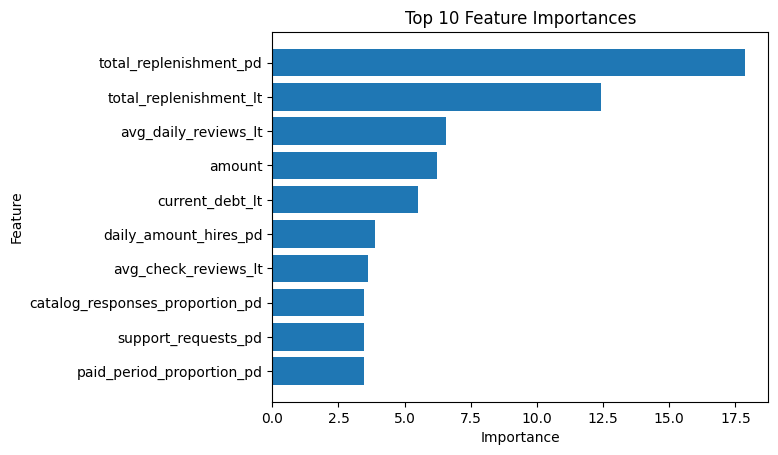

In [55]:
top_features = model.get_feature_importance(prettified=True).head(10)
top_features = top_features.sort_values(by='Importances', ascending=False)

plt.barh(top_features['Feature Id'], top_features['Importances'])
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

total_replenishment_pd в тренировочных данных:
count      22056.00
mean       57816.12
std       181297.02
min            0.00
25%         2500.00
50%         8000.00
75%        24500.00
max      1290836.00
Name: total_replenishment_pd, dtype: object

total_replenishment_pd в новых данных:
count     31837.00
mean       7309.59
std       16826.41
min           0.00
25%           0.00
50%           0.00
75%        7700.00
max      657600.00
Name: total_replenishment_pd, dtype: object

total_replenishment_pd в тренировочных данных после удаления выбросов:
count     21315.00
mean      26944.65
std       63470.31
min           0.00
25%        2260.00
50%        7500.00
75%       21500.00
max      587913.00
Name: total_replenishment_pd, dtype: object

total_replenishment_lt в тренировочных данных:
count      22056.00
mean      125604.96
std       232241.31
min            0.00
25%        11098.75
50%        34000.00
75%       120611.25
max      1626484.00
Name: total_replenishment_lt, dtype: 

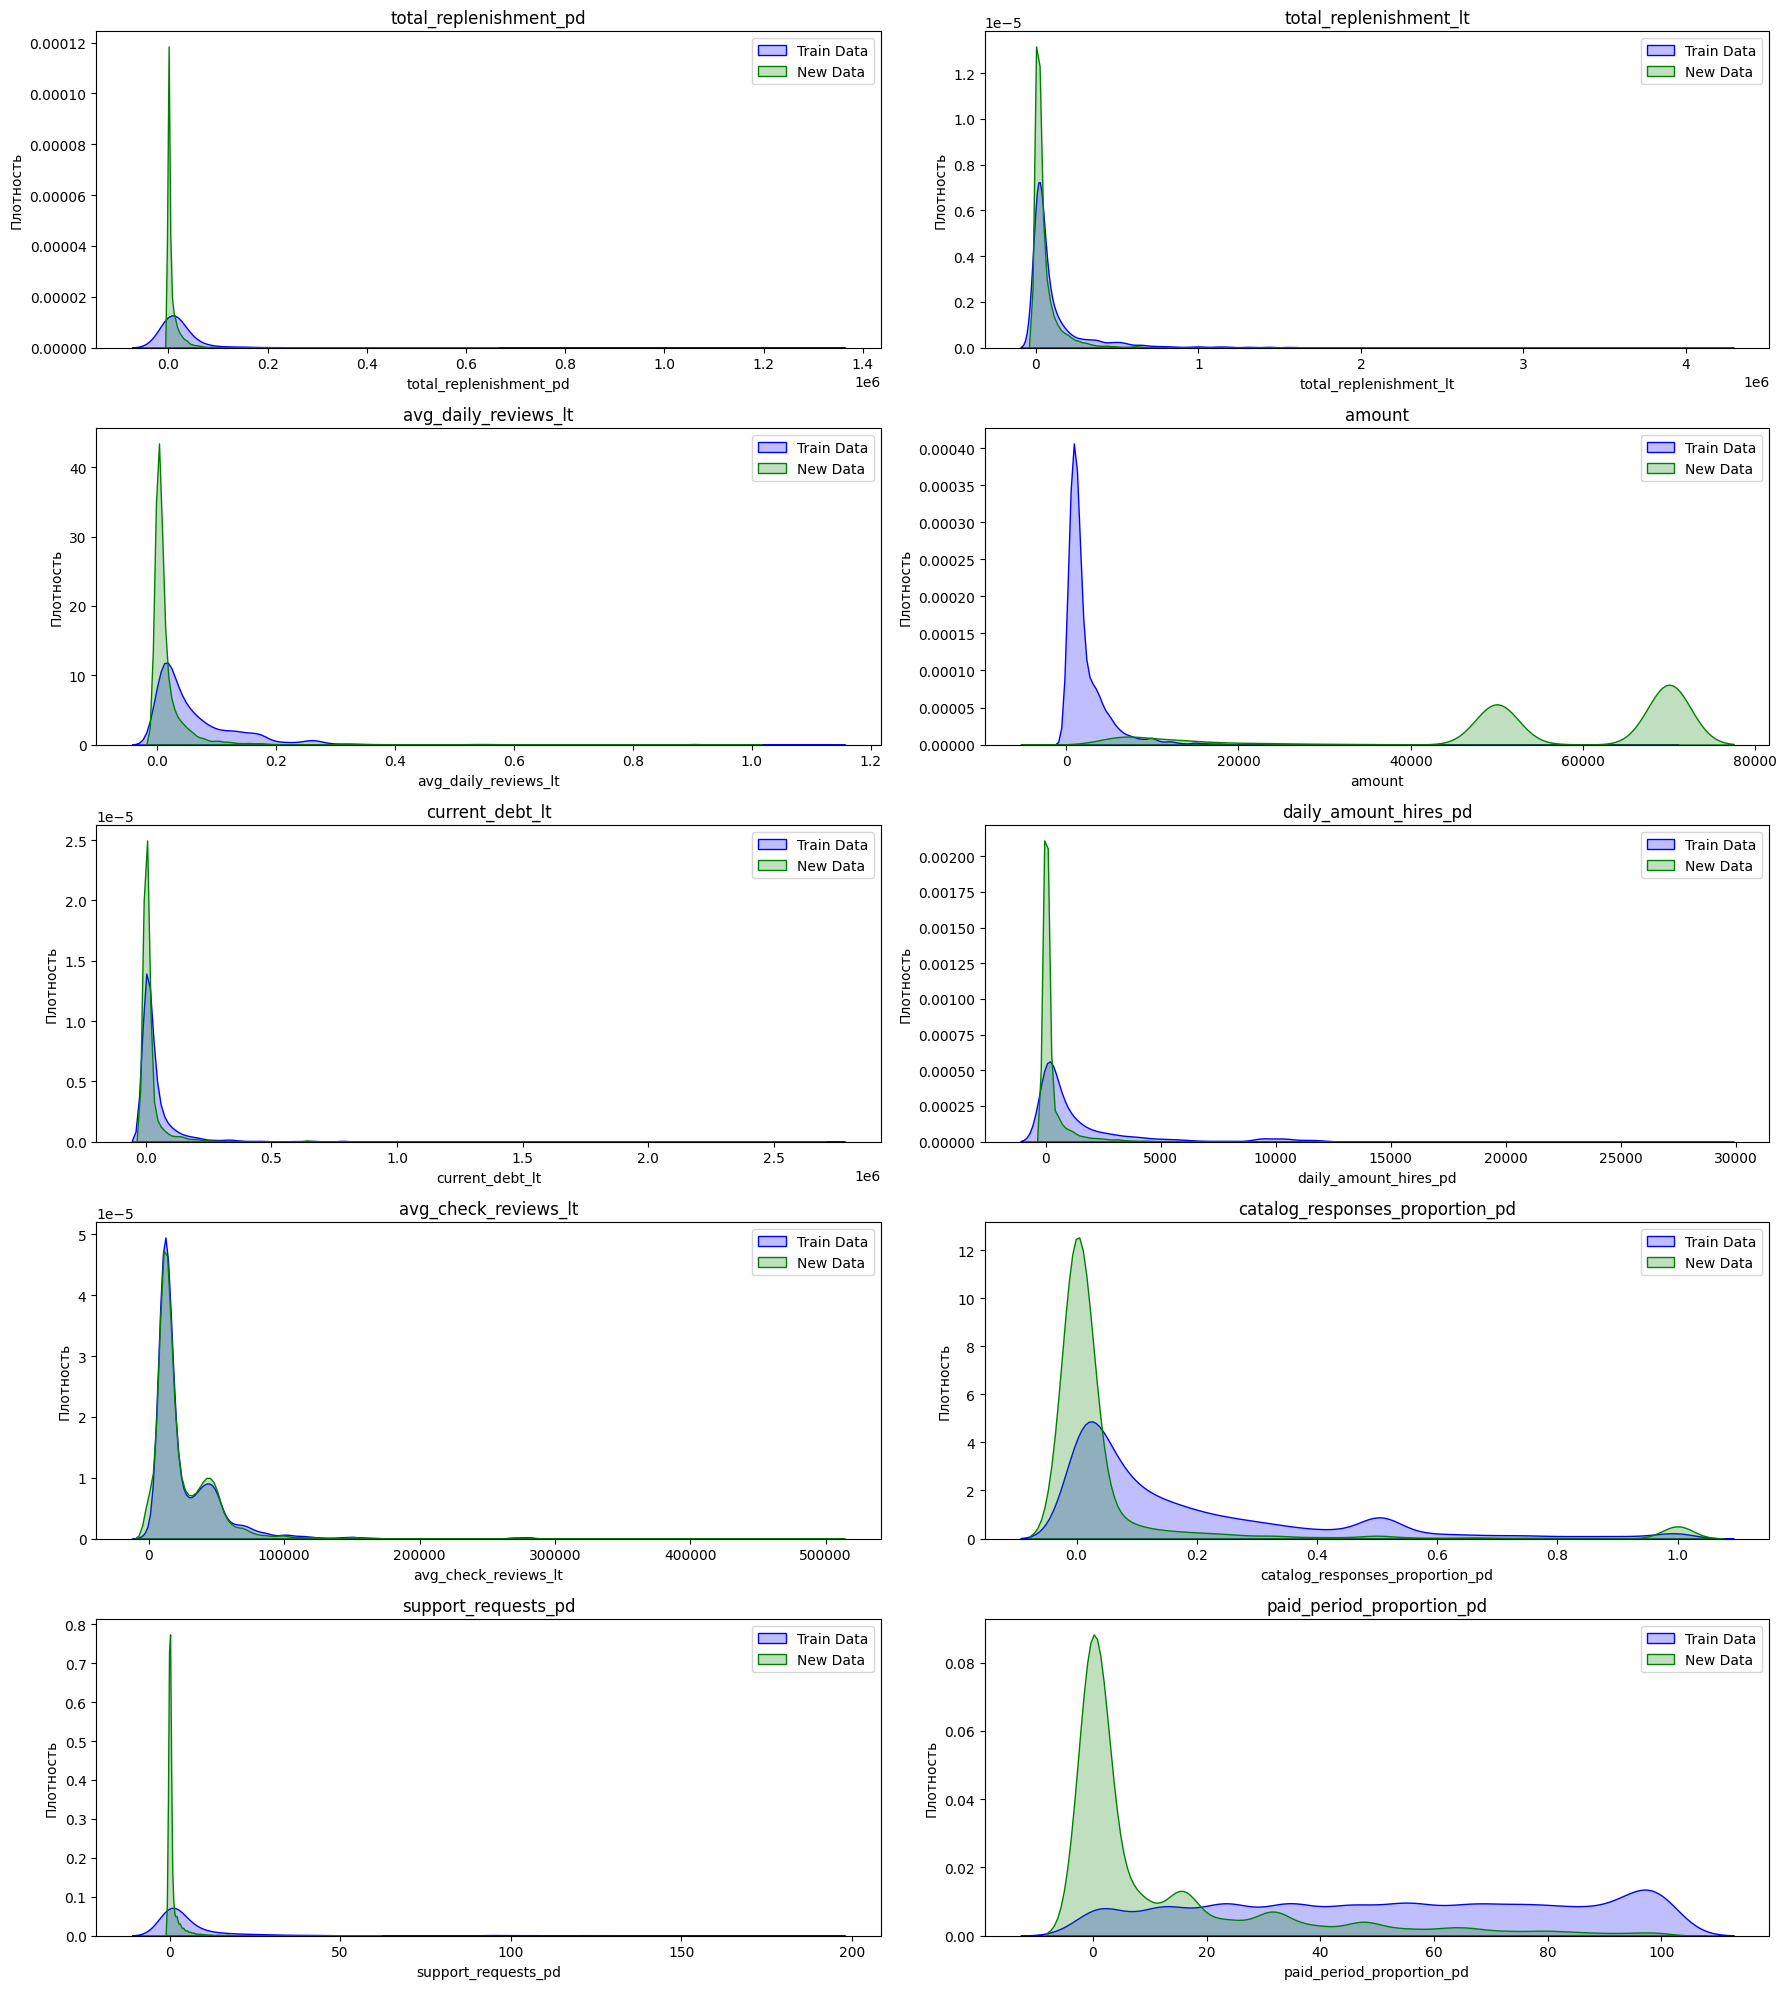

Было удалено 1643 строк в тренировочных данных (7.45% от исходного размера тренировочных данных)


In [64]:
original_rows_train = len(train_data)
original_rows_new = len(new_data)
removed_rows_total_train = 0

def remove_outliers(data, feature):
    q1 = data[feature].quantile(0.05)
    q3 = data[feature].quantile(0.95)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    cleaned_data = data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]
    return cleaned_data

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(18, 20), dpi=100)
axes = axes.ravel()

top_10_features = top_features['Feature Id']

for i, feature in enumerate(top_10_features):
    data_train_cleaned = remove_outliers(train_data, feature)
    
    sns.kdeplot(train_data[feature], ax=axes[i], shade=True, color='b', label='Train Data')
    sns.kdeplot(new_data[feature], ax=axes[i], shade=True, color='g', label='New Data')
    axes[i].set_title(f"{feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Плотность')
    axes[i].legend()
    
    print(f"{feature} в тренировочных данных:")
    print(train_data[feature].describe().apply(lambda x: f"{x:.2f}"))
    print()
    print(f"{feature} в новых данных:")
    print(new_data[feature].describe().apply(lambda x: f"{x:.2f}"))
    print()
    print(f"{feature} в тренировочных данных после удаления выбросов:")
    print(data_train_cleaned[feature].describe().apply(lambda x: f"{x:.2f}"))
    print()
    
    removed_rows_train = original_rows_train - len(data_train_cleaned)
    removed_rows_total_train += removed_rows_train

plt.tight_layout()
plt.show()

removal_ratio_train = removed_rows_total_train / original_rows_train * 100

print(f"Было удалено {removed_rows_total_train} строк в тренировочных данных ({removal_ratio_train:.2f}% от исходного размера тренировочных данных)")

In [36]:
new_data.shape

(31837, 36)

In [37]:
train_data.shape

(22056, 64)